C:\Users\venka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


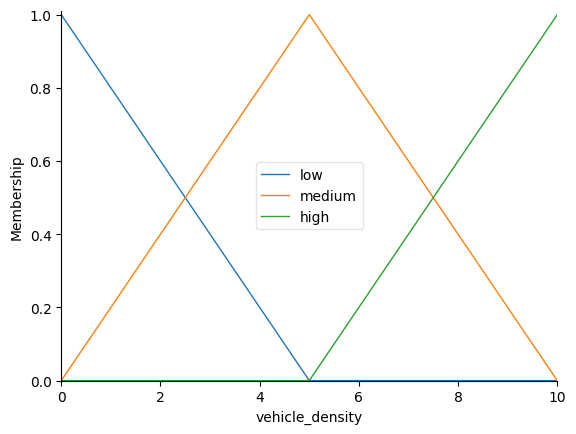

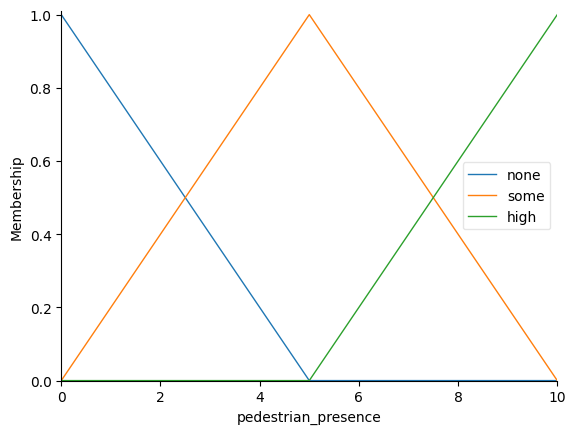

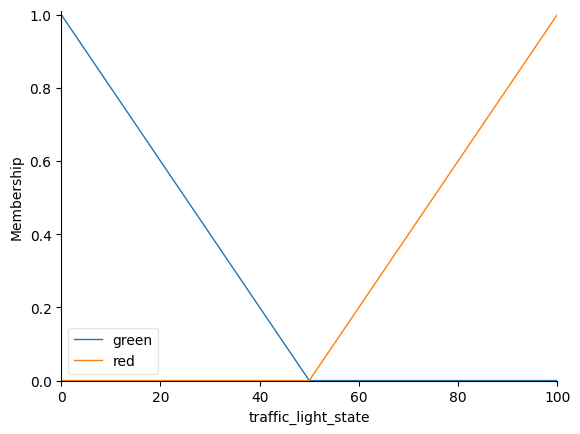

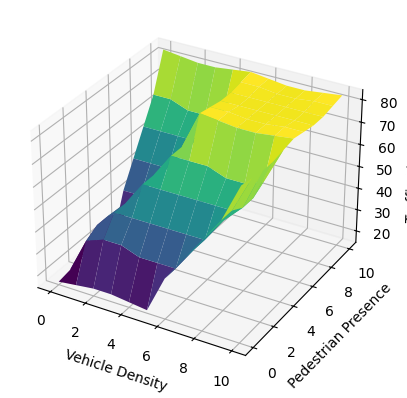

Traffic Light State: 82.45 (Green: 17.55%, Red: 82.45%)
Traffic Light State: 33.52 (Green: 66.48%, Red: 33.52%)
Traffic Light State: 74.03 (Green: 25.97%, Red: 74.03%)
Traffic Light State: 76.55 (Green: 23.45%, Red: 76.55%)
Traffic Light State: 53.20 (Green: 46.80%, Red: 53.20%)
Traffic Light State: 70.85 (Green: 29.15%, Red: 70.85%)
Traffic Light State: 77.94 (Green: 22.06%, Red: 77.94%)
Traffic Light State: 50.64 (Green: 49.36%, Red: 50.64%)
Traffic Light State: 82.07 (Green: 17.93%, Red: 82.07%)
Traffic Light State: 33.09 (Green: 66.91%, Red: 33.09%)


In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import time
import matplotlib.pyplot as plt

# Define fuzzy logic variables
vehicle_density = ctrl.Antecedent(np.arange(0, 11, 1), 'vehicle_density')
pedestrian_presence = ctrl.Antecedent(np.arange(0, 11, 1), 'pedestrian_presence')
traffic_light_state = ctrl.Consequent(np.arange(0, 101, 1), 'traffic_light_state')

# Define membership functions for vehicle_density
vehicle_density['low'] = fuzz.trimf(vehicle_density.universe, [0, 0, 5])
vehicle_density['medium'] = fuzz.trimf(vehicle_density.universe, [0, 5, 10])
vehicle_density['high'] = fuzz.trimf(vehicle_density.universe, [5, 10, 10])

# Define membership functions for pedestrian_presence
pedestrian_presence['none'] = fuzz.trimf(pedestrian_presence.universe, [0, 0, 5])
pedestrian_presence['some'] = fuzz.trimf(pedestrian_presence.universe, [0, 5, 10])
pedestrian_presence['high'] = fuzz.trimf(pedestrian_presence.universe, [5, 10, 10])

# Define membership functions for traffic_light_state
traffic_light_state['green'] = fuzz.trimf(traffic_light_state.universe, [0, 0, 50])
traffic_light_state['red'] = fuzz.trimf(traffic_light_state.universe, [50, 100, 100])

# Define fuzzy rules
rules = [
    ctrl.Rule(vehicle_density['low'] & pedestrian_presence['none'], traffic_light_state['green']),
    ctrl.Rule(vehicle_density['low'] & pedestrian_presence['some'], traffic_light_state['green']),
    ctrl.Rule(vehicle_density['low'] & pedestrian_presence['high'], traffic_light_state['red']),
    ctrl.Rule(vehicle_density['medium'] & pedestrian_presence['none'], traffic_light_state['green']),
    ctrl.Rule(vehicle_density['medium'] & pedestrian_presence['some'], traffic_light_state['red']),
    ctrl.Rule(vehicle_density['medium'] & pedestrian_presence['high'], traffic_light_state['red']),
    ctrl.Rule(vehicle_density['high'] & pedestrian_presence['none'], traffic_light_state['red']),
    ctrl.Rule(vehicle_density['high'] & pedestrian_presence['some'], traffic_light_state['red']),
    ctrl.Rule(vehicle_density['high'] & pedestrian_presence['high'], traffic_light_state['red']),
]

# Create control system and simulation
traffic_light_ctrl = ctrl.ControlSystem(rules)
traffic_light = ctrl.ControlSystemSimulation(traffic_light_ctrl)

# Sample function to simulate retrieving data from sensors
def retrieve_real_time_data():
    # This is a placeholder function. Replace it with real-world data retrieval.
    # Return simulated data for demonstration purposes.
    vehicle_density_value = np.random.uniform(0, 10)  # Simulated vehicle density
    pedestrian_presence_value = np.random.uniform(0, 10)  # Simulated pedestrian presence
    return vehicle_density_value, pedestrian_presence_value

# Visualize membership functions
vehicle_density.view()
pedestrian_presence.view()
traffic_light_state.view()

# Visualize control surface
vehicle_density_values = np.arange(0, 11, 1)
pedestrian_presence_values = np.arange(0, 11, 1)
x, y = np.meshgrid(vehicle_density_values, pedestrian_presence_values)
z = np.zeros_like(x)

for i in range(11):
    for j in range(11):
        traffic_light.input['vehicle_density'] = x[i, j]
        traffic_light.input['pedestrian_presence'] = y[i, j]
        traffic_light.compute()
        z[i, j] = traffic_light.output['traffic_light_state']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_xlabel('Vehicle Density')
ax.set_ylabel('Pedestrian Presence')
ax.set_zlabel('Traffic Light State')
plt.show()

# Main loop to control the traffic light
iteration_count = 10  # Set the number of iterations for the loop

for _ in range(iteration_count):
    # Retrieve real-time data
    vehicle_density_value, pedestrian_presence_value = retrieve_real_time_data()

    # Provide inputs to the control system
    traffic_light.input['vehicle_density'] = vehicle_density_value
    traffic_light.input['pedestrian_presence'] = pedestrian_presence_value

    # Compute the traffic light state based on inputs
    traffic_light.compute()

    # Get the computed traffic light state output
    traffic_light_state_output = traffic_light.output['traffic_light_state']

    # Display the traffic light state
    print(f"Traffic Light State: {traffic_light_state_output:.2f} (Green: {100 - traffic_light_state_output:.2f}%, Red: {traffic_light_state_output:.2f}%)")

    # Actuate the traffic light state (e.g., change light colors based on state)
    # Add your code here to control the traffic lights based on the output value.
    # For example, if the output is closer to 0, set the light to green; if closer to 100, set it to red.

    # Wait for a period of time before next iteration
    time.sleep(5)  # Adjust the delay as needed for real-time control  give me the code for performing unit testing on this project